 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
csvpath = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull()
whale_returns_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna().copy()
whale_returns_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
csvpath = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna().copy()
algo_returns_df


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
csvpath = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace("$","")
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace(",","")
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df.dtypes


C:\Users\mmash\AppData\Local\Temp\ipykernel_16680\845537338.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history_df['Close'] = sp500_history_df['Close'].str.replace("$","")


Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_df.pct_change()
sp500_history_df.head(100)


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2018-12-03,2790.37
2018-11-30,2760.17
2018-11-29,2737.76


In [12]:
# Drop nulls
sp500_daily_returns.isnull()
sp500_daily_returns.isnull().sum()

sp500_daily_returns = sp500_daily_returns.dropna().copy()
sp500_daily_returns


,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns={
    "Close": "SP500_Daily_Returns"
})

sp500_daily_returns.head()


,SP500_Daily_Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis="columns", join="inner")
combined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

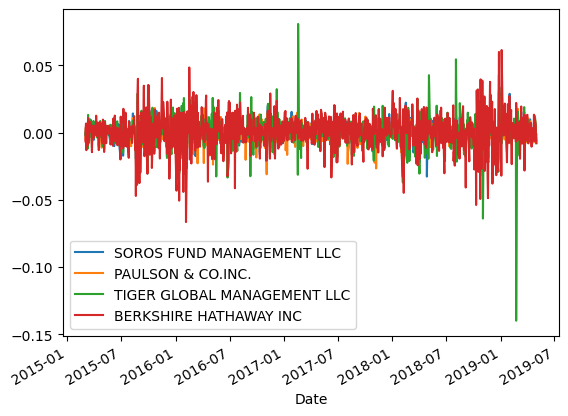

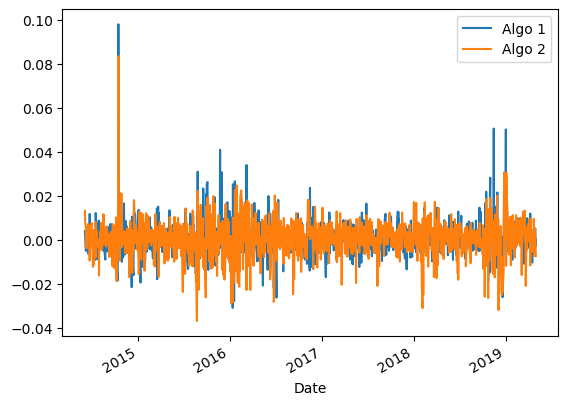

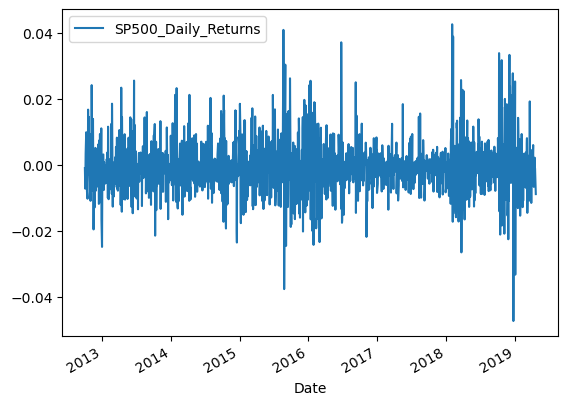

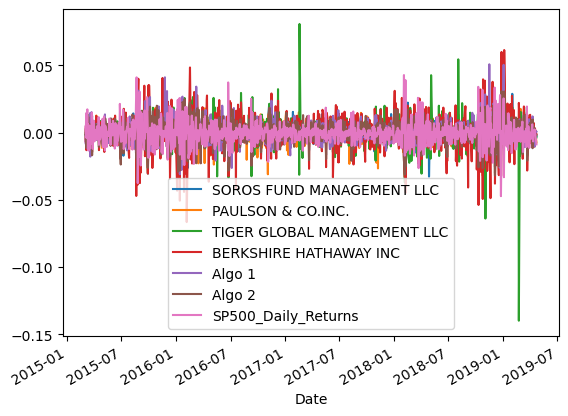

In [15]:
# Plot daily returns of all portfolios
whale_returns_df.plot()
algo_returns_df.plot()
sp500_daily_returns.plot()
combined_df.plot()


#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

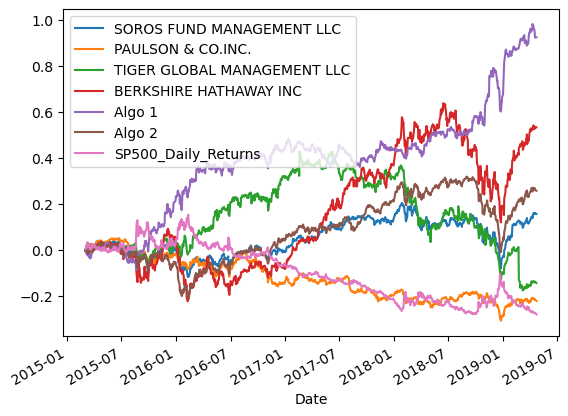

In [16]:
# Calculate cumulative returns of all portfolios

combined_cumulative_returns = (1 + combined_df).cumprod() - 1
combined_cumulative_returns.head()

# Plot cumulative returns

combined_cumulative_returns.plot()


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

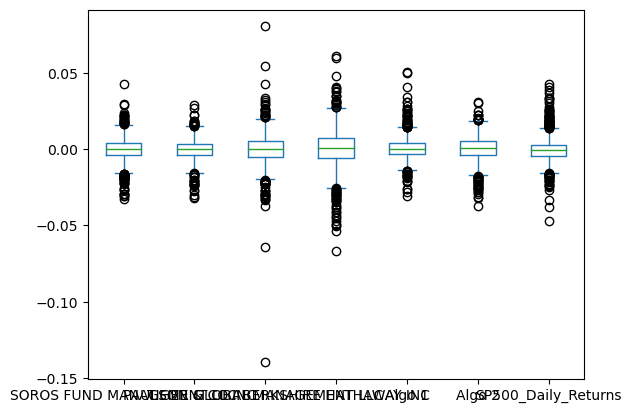

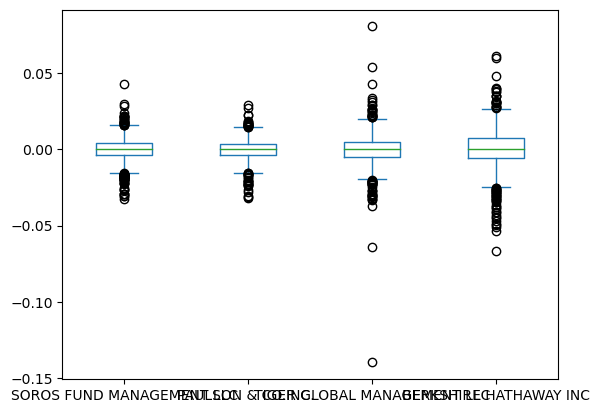

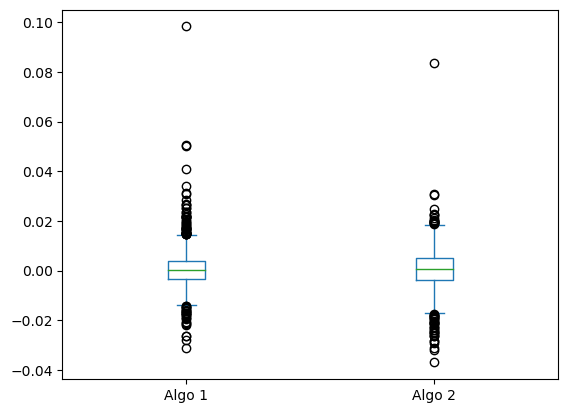

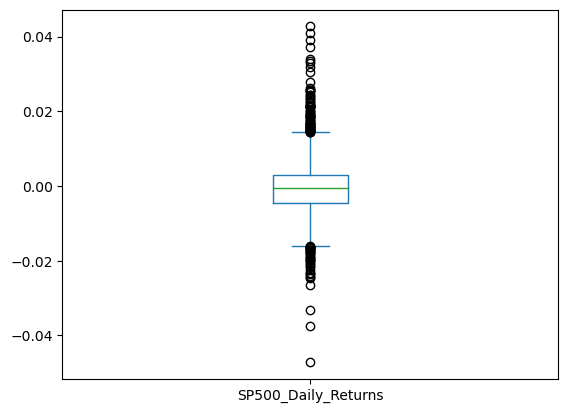

In [17]:
# Box plot to visually show risk
combined_df.plot.box()
whale_returns_df.plot.box()
algo_returns_df.plot.box()
sp500_daily_returns.plot.box()


### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
whale_returns_std = whale_returns_df.std()
whale_returns_std
algo_returns_std = algo_returns_df.std()
algo_returns_std
combined_std = combined_df.std()
combined_std


SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500_Daily_Returns            0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = sp500_daily_returns.std()
sp500_daily_std.head()

# Determine which portfolios are riskier than the S&P 500
print(whale_returns_std[1])
print(sp500_daily_std[0])
combined_std < combined_std["SP500_Daily_Returns"]


0.006976871441189292
0.008134642617809523


SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.               True
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC         False
Algo 1                          True
Algo 2                          True
SP500_Daily_Returns            False
dtype: bool

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500_Daily_Returns            0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

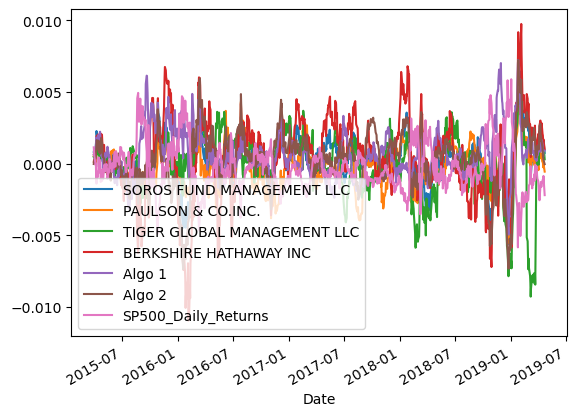

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_rln_std = combined_df.rolling(window=21).mean()
combined_rln_std

# Plot the rolling standard deviation
combined_df.rolling(window=21).mean().plot()


### Calculate and plot the correlation

<Axes: >

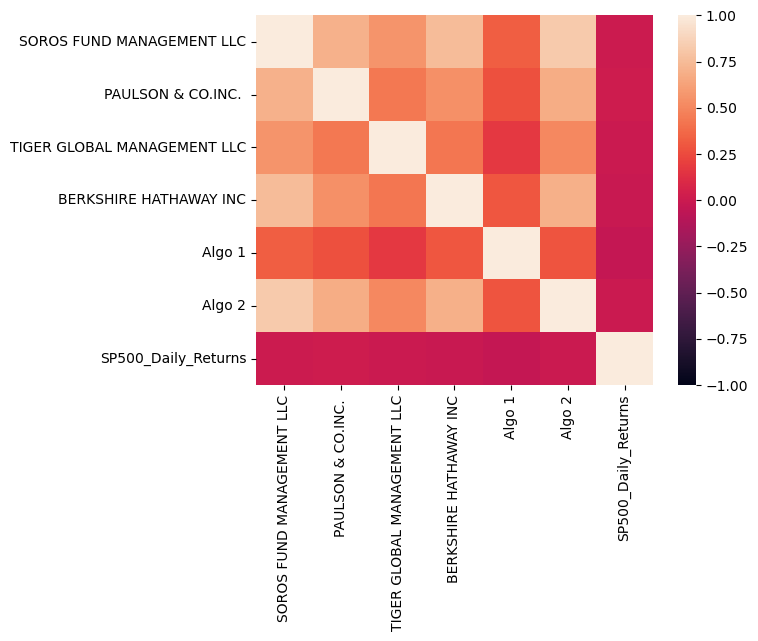

In [22]:
# Calculate the correlation
correlation = combined_df.corr()
correlation

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

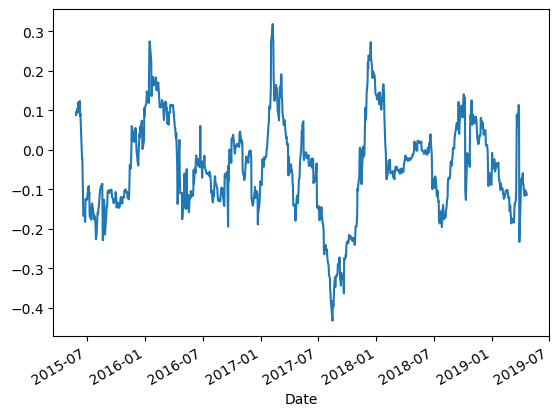

In [23]:
# Calculate covariance of a single portfolio
covariance = combined_df['Algo 1'].rolling(window=60).cov(combined_df['SP500_Daily_Returns'])
covariance

# Calculate variance of S&P 500
variance = combined_df['SP500_Daily_Returns'].rolling(window=60).var()
variance

# Computing beta
beta = covariance / variance
beta

# Plot beta trend
beta.plot()


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [24]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003962
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.007961
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.008178
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.009475
...,...,...,...,...,...,...,...
2019-04-15,0.007755,0.006960,0.016572,0.012136,0.006880,0.008065,0.007823
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007721
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007595


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios

## 1 sharpe_ratios = ((combined_df.mean()-combined_df['rf_rate'].mean()) * 252) / (combined_df.std() * np.sqrt(252))
##  sharpe_ratios

## 2  sharpe_ratios = (all_returns.mean() * 252) / (all_portfolio_std * np.sqrt(252))
## 2 sharpe_ratios.head()

sharpe_ratios = (combined_df.mean() * 252) / (combined_std * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500_Daily_Returns           -0.518582
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

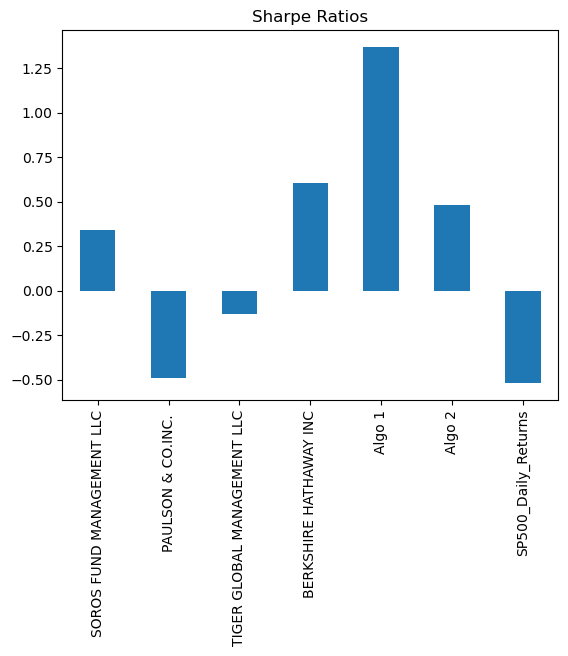

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [ ]:
## Alorithmic strategies outperform the market (S&P 500) and the whales portfolios

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
csvpath = Path("Resources/pep_hist.csv")
pep_hist = pd.read_csv(csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
pep_hist.head()


,Close
Date,
2018-05-11,97.43
2018-05-14,97.15
2018-05-15,96.80
2018-05-16,97.19
2018-05-17,97.92


In [28]:
# Reading data from 2nd stock 
csvpath = Path("Resources/amd_hist.csv")
amd_hist = pd.read_csv(csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
amd_hist.head()


,Close
Date,
2018-05-11,11.95
2018-05-14,12.23
2018-05-15,12.45
2018-05-16,12.82
2018-05-17,12.82


In [29]:
# Reading data from 3rd stock
csvpath = Path("Resources/meta_hist.csv")
meta_hist = pd.read_csv(csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
meta_hist.head()


,Close
Date,
2018-05-11,186.99
2018-05-14,186.64
2018-05-15,184.32
2018-05-16,183.20
2018-05-17,183.76


In [30]:
# Combine all stocks in a single DataFrame
combined_portfolio = pd.concat([pep_hist, amd_hist, meta_hist], axis="columns", join="inner")
combined_portfolio.head()


,Close,Close,Close
Date,,,
2018-05-11,97.43,11.95,186.99
2018-05-14,97.15,12.23,186.64
2018-05-15,96.80,12.45,184.32
2018-05-16,97.19,12.82,183.20
2018-05-17,97.92,12.82,183.76


In [31]:
# Reset Date index
combined_portfolio.index
combined_portfolio.sort_index(ascending=False)


,Close,Close,Close
Date,,,
2019-05-08,126.02,27.09,189.54
2019-05-07,125.98,26.66,189.77
2019-05-06,127.27,27.42,193.88
2019-05-03,127.67,28.22,195.47
2019-05-02,126.83,28.29,192.53
...,...,...,...
2018-05-17,97.92,12.82,183.76
2018-05-16,97.19,12.82,183.20
2018-05-15,96.80,12.45,184.32


In [32]:
# Reorganize portfolio data by having a column per symbol
combined_portfolio = combined_portfolio.sort_index(ascending=False)
combined_portfolio.columns = ['Close, PEP', 'Close, AMD', 'Close, META']
combined_portfolio.head()


,"Close, PEP","Close, AMD","Close, META"
Date,,,
2019-05-08,126.02,27.09,189.54
2019-05-07,125.98,26.66,189.77
2019-05-06,127.27,27.42,193.88
2019-05-03,127.67,28.22,195.47
2019-05-02,126.83,28.29,192.53


In [33]:
# Calculate daily returns
portfolio_returns = combined_portfolio.pct_change()
portfolio_returns.columns = ['PEP', 'AMD', 'META']

# Drop NAs
portfolio_returns = portfolio_returns.dropna().copy()

# Display sample data
portfolio_returns.head(100)


,PEP,AMD,META
Date,,,
2019-05-07,-0.000317,-0.015873,0.001213
2019-05-06,0.010240,0.028507,0.021658
2019-05-03,0.003143,0.029176,0.008201
2019-05-02,-0.006579,0.002481,-0.015041
2019-05-01,0.003233,-0.052315,0.002597
...,...,...,...
2018-12-18,0.016358,0.073789,0.078205
2018-12-17,0.009210,-0.034359,-0.024154
2018-12-14,0.009569,0.056824,0.027605


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]
portfolio_returns = portfolio_returns.dot(weights)

# Display sample data
portfolio_returns.columns = ['Date', 'My Portfolio']
portfolio_returns.head()


Date
2019-05-07   -0.004992
2019-05-06    0.020135
2019-05-03    0.013507
2019-05-02   -0.006380
2019-05-01   -0.015495
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
joined_portfolios = pd.concat([combined_df, portfolio_returns], axis="columns", join="inner")
joined_portfolios


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns,0
Date,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,-0.006046
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,-0.000489
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.008920
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,-0.003501
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.003372
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.002303
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.006569
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.001563


In [49]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_portfolios = joined_portfolios.dropna().copy()
joined_portfolios.columns = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'SP500_Daily_Returns', 'My_Portfolio']
joined_portfolios


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns,My_Portfolio
Date,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,-0.006046
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,-0.000489
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.008920
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,-0.003501
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.003372
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.002303
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.006569
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.001563


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [50]:
# Calculate the annualized `std`
joined_std = joined_portfolios.std()
combined_std
annualized_joined_std = joined_std * np.sqrt(252)
annualized_joined_std


SOROS FUND MANAGEMENT LLC      0.146589
PAULSON & CO.INC.              0.116683
TIGER GLOBAL MANAGEMENT LLC    0.232434
BERKSHIRE HATHAWAY INC         0.246819
Algo 1                         0.133645
Algo 2                         0.139204
SP500_Daily_Returns            0.152147
My_Portfolio                   0.298220
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

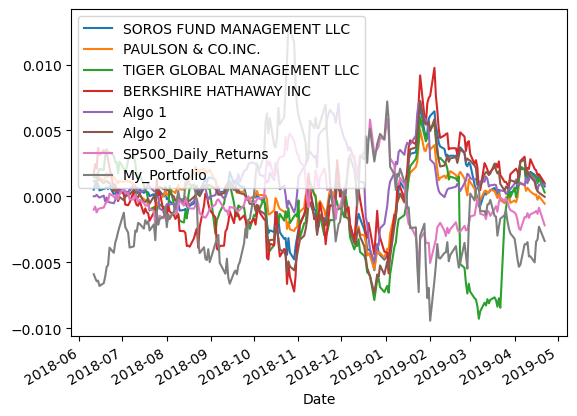

In [51]:
# Calculate rolling standard deviation
joined_rln_std = joined_portfolios.rolling(window=21).mean()
joined_rln_std

# Plot rolling standard deviation
joined_portfolios.rolling(window=21).mean().plot()


### Calculate and plot the correlation

<Axes: >

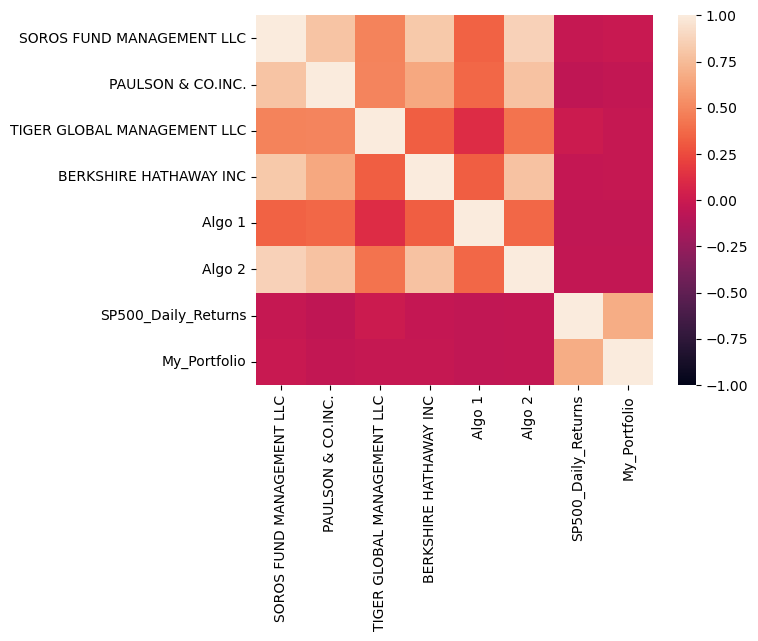

In [52]:
# Calculate and plot the correlation
joined_correlation = joined_portfolios.corr()
correlation

sns.heatmap(joined_correlation, vmin=-1, vmax=1)


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: xlabel='Date'>

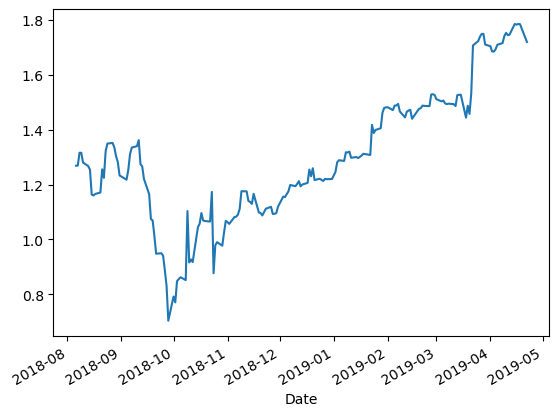

In [53]:
# Calculate and plot Beta
## Calculate covariance of a single portfolio
portfolio_covariance = joined_portfolios['My_Portfolio'].rolling(window=60).cov(joined_portfolios['SP500_Daily_Returns'])
portfolio_covariance

## Calculate variance of S&P 500
portfolio_variance = joined_portfolios['SP500_Daily_Returns'].rolling(window=60).var()
portfolio_variance

## Computing beta
portfolio_beta = portfolio_covariance / portfolio_variance
portfolio_beta

## Plot beta trend
portfolio_beta.plot()


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [54]:
# Calculate Annualized Sharpe Ratios
portfolios_sharpe_ratios = (joined_portfolios.mean() * 252) / (joined_std * np.sqrt(252))
portfolios_sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
TIGER GLOBAL MANAGEMENT LLC   -1.052249
BERKSHIRE HATHAWAY INC         0.085005
Algo 1                         1.999866
Algo 2                         0.009467
SP500_Daily_Returns           -0.432942
My_Portfolio                  -0.942718
dtype: float64

<Axes: title={'center': 'Portfolios Sharpe Ratios'}>

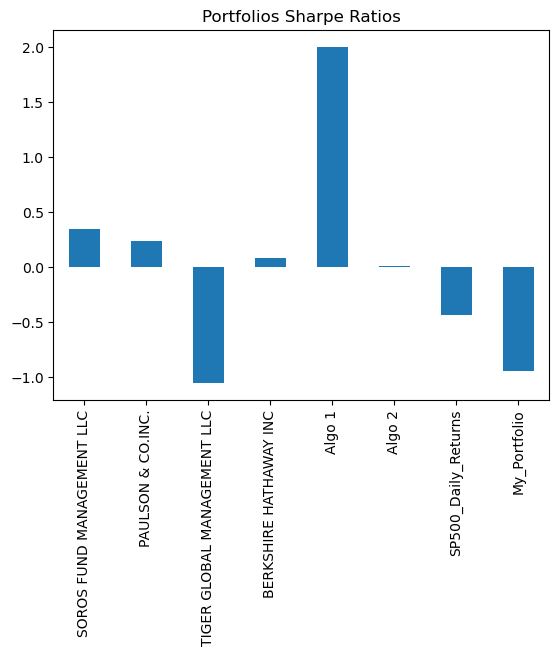

In [55]:
# Visualize the sharpe ratios as a bar plot
portfolios_sharpe_ratios.plot(kind="bar", title="Portfolios Sharpe Ratios")


### How does your portfolio do?

Write your answer here!

In [ ]:
# Unfortunately, the chosen portfolio perfomed second worse after Tiger Global Management llC.